I had the idea for this short post while working on last week's post about [drawing simple protein--ligand interaction diagrams](https://greglandrum.github.io/rdkit-blog/posts/2025-09-26-drawing-interactions-1.html).
It shows a quick way to force the RDKit's 2D coordinate generator to put non-bonded atoms close to each other in a drawing. I use the examples of rendering intramolecular H bonds and chelators.

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor


In [2]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 350,300

Let's start with a simple molecule that forms intramolecular hydrogen bonds, malonaldehyde (I also used this as the example in the blog post on [generating 3D conformers which include intramolecular H bonds](https://greglandrum.github.io/rdkit-blog/posts/2024-07-28-confgen-and-intramolecular-hbonds.html)).

The 2D coordinate generation code generates an extended 2D conformer for malonaldehyde:

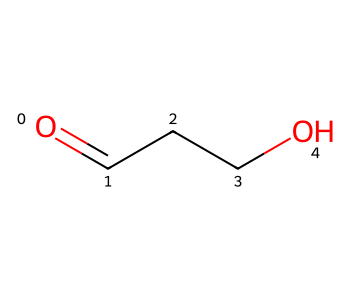

In [3]:
m = Chem.MolFromSmiles('O=CCCO')
m

This type of extended conformer looks completely reasonable and is, for most molecules, almost certainly the right way to draw chains, but in this case I want to actually show the H bond.

To do so, I start by adding the H which will be involved in the H bond to the molecule:

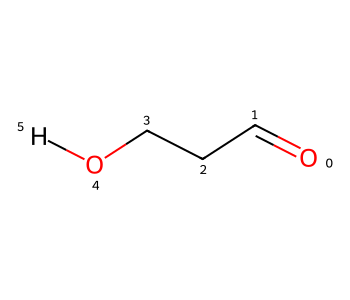

In [18]:
m2 = Chem.RWMol(m)
aid = m2.AddAtom(Chem.Atom(1))
m2.AddBond(4,aid,Chem.BondType.SINGLE)
m2

We still have an extended conformer. I can force this to change by doing something non-physical and adding a single bond between the H and O0:

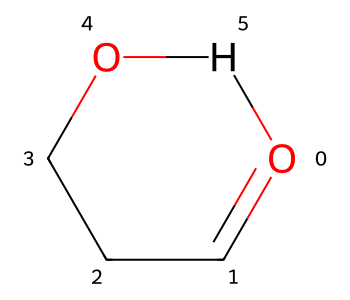

In [19]:
bid1 = m2.AddBond(0,aid,Chem.BondType.SINGLE)
m2

That has the coordinates I wanted, but having the H bond drawn as a single bond is definitely not desirable.

To solve this I'm going to explicitly generate the coordinates for the molecule with the single bond present (instead of relying up on the notebook code to generate a temporary set of coordinates), then remove the single bond and render the molecule:

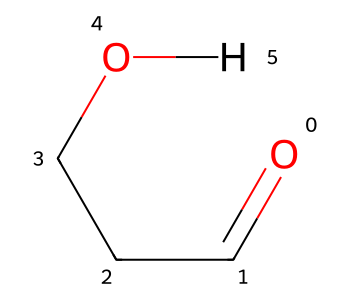

In [20]:
rdDepictor.Compute2DCoords(m2)
m2.RemoveBond(0,aid)
m2

That's what I was looking for.

If I want to actually include the H bond in the drawing in a way that won't make chemists cringe, I can add a hydrogen bond:

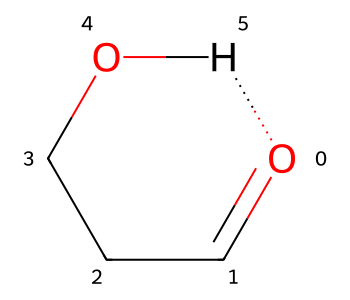

In [21]:
bid1 = m2.AddBond(0,aid,Chem.BondType.HYDROGEN)
m2

Note that simply adding the hydrogen bond to start with would not have worked since zero-order bonds are not included in the RDKit's ring-finding code by default:

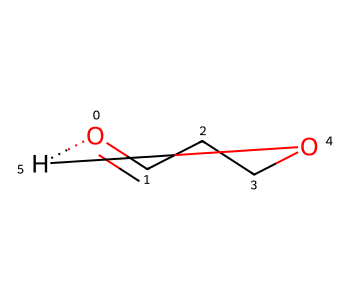

In [22]:
m3 = Chem.RWMol(m)
aid = m3.AddAtom(Chem.Atom(1))
m3.AddBond(4,aid,Chem.BondType.SINGLE)
m3.AddBond(0,aid,Chem.BondType.HYDROGEN)
m3

Here's a more complex molecule where I want to show two intramolecular H bonds:

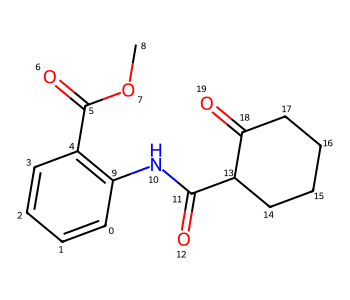

In [23]:
m = Chem.MolFromSmiles('c1cccc(C(=O)OC)c1NC(=O)C1CCCCC1(=O)')
m

In this case I would like to indicate H bonds between the H on N10 and O6 as well as the H on C0 and O12.

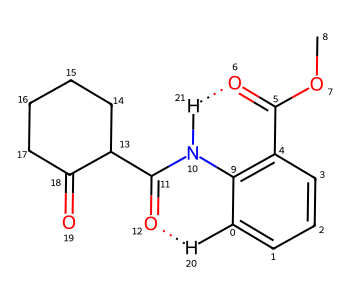

In [26]:
# Add the Hs:
m2 = Chem.RWMol(m)
aid1 = m2.AddAtom(Chem.Atom(1))
m2.AddBond(0,aid1,Chem.BondType.SINGLE)
aid2 = m2.AddAtom(Chem.Atom(1))
m2.AddBond(10,aid2,Chem.BondType.SINGLE)

# Add single bonds for the intramolecular H bonds:
bid1 = m2.AddBond(aid1,12,Chem.BondType.SINGLE)
bid2 = m2.AddBond(aid2,6,Chem.BondType.SINGLE)

# generate coordinates:
rdDepictor.Compute2DCoords(m2)

# convert to H bonds:
m2.GetBondWithIdx(bid1-1).SetBondType(Chem.BondType.HYDROGEN)
m2.GetBondWithIdx(bid2-1).SetBondType(Chem.BondType.HYDROGEN)

m2

We can use a similar trick to get conformers of chelators that have the chelating atoms in the expected geometry.

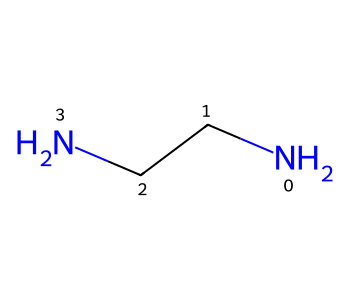

In [35]:
m = Chem.MolFromSmiles('NCCN')
m

This time I'm going to add an extra atom (to stand in for the atom which will eventually be chelated), form bonds to that, and then remove that atom after generating 2D coordinates:

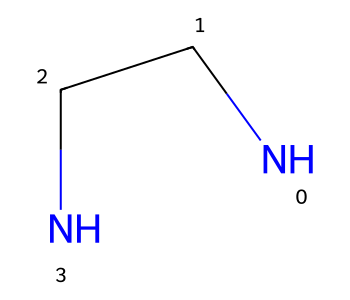

In [36]:
m2 = Chem.RWMol(m)
aid = m2.AddAtom(Chem.Atom(0))
m2.AddBond(0,aid,Chem.BondType.SINGLE)
m2.AddBond(3,aid,Chem.BondType.SINGLE)
rdDepictor.Compute2DCoords(m2)
m2.RemoveAtom(aid)
m2